In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Генерирование гауссовских случайных процессов

## 1. Генерирование с помощью многомерного нормального вектора

Если вам нужно сгенерировать реализацию гауссовского случайного процесса $X = (X_t)_{t \geqslant 0}$ фиксированной известной (и не слишком большой) длины $n$, можно воспользоваться тем фактом, что конечномерные распределения гауссовского случайного процесса являются нормальными, а его моменты (математическое ожидание $m(t)$ и ковариационная функция $R(t_1, t_2)$ известны. В этом случае достаточно рассмотреть $n$ моментов времени $t_1, \ldots, t_n$ и сгенерировать $n$-мерный случайный гауссовский вектор с нужными математическим ожиданием $m(t_1), \ldots, m(t_n)$ и ковариационной матрицей $\Sigma = R(t_i, t_i)$.

Заметим, что если $Z$ - стандартно нормально распределенная случайная величина, т.е. $Z \sim N(0, 1)$, то ее линейное преобразование $X = \mu + \sigma Z$ имеет также нормальное распределение, причем $X \sim N(\mu, \sigma^2)$. 

Аналогичное соотношение существует и для многомерных нормальных векторов. А именно, пусть $\mathbf{Z} = (Z_1, \ldots, Z_n) \sim N(0, \mathbf{I})$, где $\mathbf{I} = \mathrm{diag}(1, \ldots, 1)$ - единичная матрица. Тогда случайный вектор $\mathbf{X} = \mathbf{\mu} + \mathbf{C} \mathbf{Z}$ имеет нормальное $N(\mathbf{\mu}, \mathbf{\Sigma})$ распределение, где $\mathbf{\mu} = (\mu_1, \ldots, \mu_n)$ - желаемый вектор средних, а матрицы $\mathbf{C}$ и $\mathbf{\Sigma}$ связаны соотношениями $\mathbf{\Sigma} = \mathbf{C} \mathbf{C}^T$. Последнее соотношение называется разложением Холецкого положительно полуопределенной $n \times n$ матрицы $\mathbf{\Sigma}$, причем $n \times n$  матрица $\mathbf{C}$ оказывается нижнетреугольной.

Поэтому, чтобы сгенерировать многомерный нормальный вектор, можно поступить следующим способом. Сгенерируем $\mathbf{Z} = (Z_1, \ldots, Z_n) \sim N(0, \mathbf{I})$, вычислим $\mathbf{C}$ и положим $\mathbf{X} = \mathbf{\mu} + \mathbf{C} \mathbf{Z}$.

### 1.1. Винеровский процесс

Рассмотрим этот подход на примере простого броуновского движения $B = (B_t)_{t \geqslant 0}$. Для этого процесса $\mathrm{E} B_t = 0$, $R(s, t) = \mathrm{E} [B_s B_t] = \mathrm{min}(s, t)$. 

Вычислим вектор математических ожиданий и ковариационную матрицу для $t_i = \Delta i, i = 0, \ldots, 1000, \Delta = 10^{-2}$.

In [29]:
def compute_bm_mean(timestamps):
    return np.zeros_like(timestamps)

def compute_bm_cov(timestamps):
    n = len(timestamps)
    R = np.zeros((n, n))
    for i in xrange(n):
        for j in xrange(n):
            R[i, j] = min(timestamps[i], timestamps[j])
    return R

In [44]:
timestamps = timestamps = np.linspace(1e-2, 10, 1000)

cov_bm = compute_bm_cov(timestamps)
mean_bm = compute_bm_mean(timestamps)

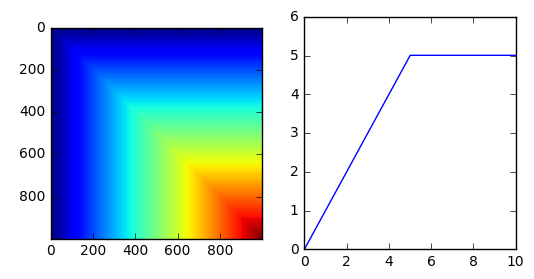

In [46]:
figure(figsize=(6, 3))
subplot(1, 2, 1)
imshow(cov_bm, interpolation='nearest')
subplot(1, 2, 2)
plot(timestamps, cov_bm[500, :])

In [57]:
c_bm = np.linalg.cholesky(cov_bm)
Z = np.random.normal(size=1000)
X = mean_bm + np.dot(c_bm, Z)

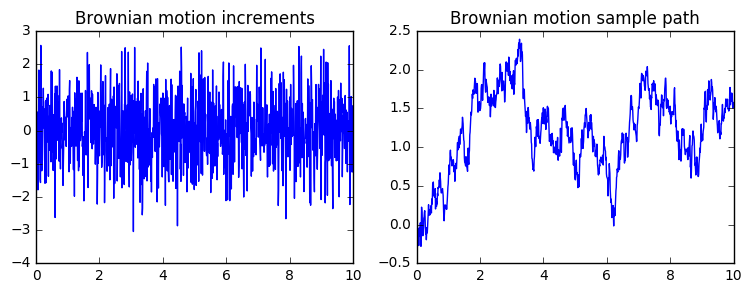

In [58]:
figure(figsize=(9, 3))
subplot(1, 2, 1)
plot(timestamps, Z)
title('Brownian motion increments')
subplot(1, 2, 2)
plot(timestamps, X)
title('Brownian motion sample path')

### 1.2. Фрактальное броуновское движение


Стандартное фрактальное броуновское движение $B^H = (B^H_t)_{t \geqslant 0}$
на $[0,T]$ с параметром Хёрста $H \in (0,1)$ -
это гауссовский процесс с непрерывными траекториями такой, что
$$
B^H_0 = 0,
\qquad
\mathrm{E} B^H_t = 0,
\qquad
\mathrm{E} [B^H_t B^H_s] = \frac{1}{2}
    \big(|t|^{2H} + |s|^{2H} - |t - s|^{2H}\big).
$$
В случае, когда $H=\frac{1}{2}$, фрактальное броуновское движение является
обыкновенным броуновским движением, в случае же $H\neq\frac{1}{2}$ процесс $B^H$ является некоторым гауссовским процессом.

In [1]:
def compute_fbm_matrix(timestamps, hurst):
    ts_begin = timestamps[0]
    dt = timestamps[1] - timestamps[0]
    time = np.array([ts - ts_begin for ts in timestamps]) + dt
    n = len(time)
    K = np.zeros(shape=(n, n))
    for index, t in enumerate(time):
        K[index, :] = np.power(time, 2. * hurst) + \
                      np.power(t, 2. * hurst) - \
                      np.power(np.abs(time - t), 2. * hurst)
    K *= 0.5
    return K

Вначале убедимся, что траектория fBm при $H = 1/2$ выглядит похожей на траекторию обыкновенного броуновского движения, а его ковариационная матрица равна ковариационной матрице обыкновенного броуновского движения.

In [62]:
timestamps = np.linspace(0.01, 10, 1000)

cov_fbm = compute_fbm_matrix(timestamps, 0.5)
cov_fbm_chol = np.linalg.cholesky(cov_fbm)

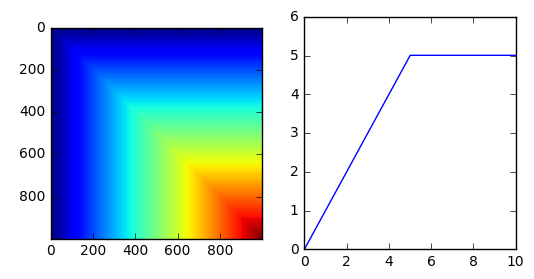

In [63]:
figure(figsize=(6, 3))
subplot(1, 2, 1)
imshow(cov_fbm, interpolation='nearest')
subplot(1, 2, 2)
plot(timestamps, cov_fbm[500, :])

In [65]:
c_bm = np.linalg.cholesky(cov_fbm)
Z = np.random.normal(size=1000)
X = mean_bm + np.dot(c_bm, Z)

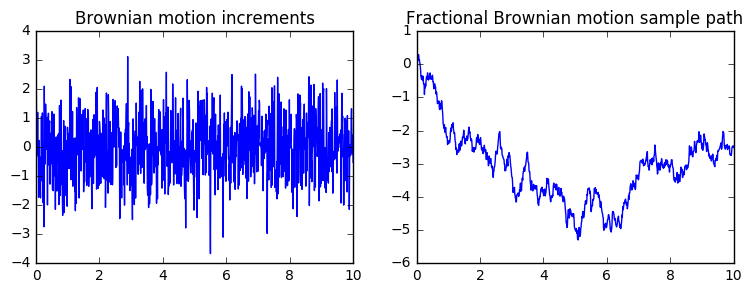

In [66]:
figure(figsize=(9, 3))
subplot(1, 2, 1)
plot(timestamps, Z)
title('Brownian motion increments')
subplot(1, 2, 2)
plot(timestamps, X)
title('Fractional Brownian motion sample path')

Теперь посмотрим, что происходит с процессом fBM при $H < 1/2$.

In [77]:
timestamps = np.linspace(0.01, 10, 1000)

cov_fbm = compute_fbm_matrix(timestamps, 0.1)
cov_fbm_chol = np.linalg.cholesky(cov_fbm)

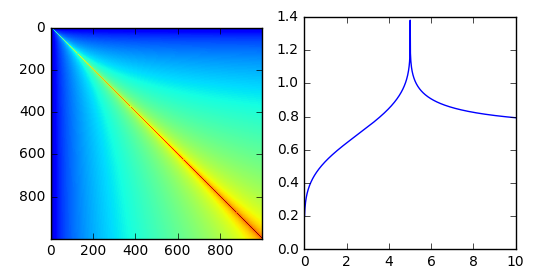

In [78]:
figure(figsize=(6, 3))
subplot(1, 2, 1)
imshow(cov_fbm, interpolation='nearest')
subplot(1, 2, 2)
plot(timestamps, cov_fbm[500, :])

In [79]:
c_bm = np.linalg.cholesky(cov_fbm)
Z = np.random.normal(size=1000)
X = mean_bm + np.dot(c_bm, Z)

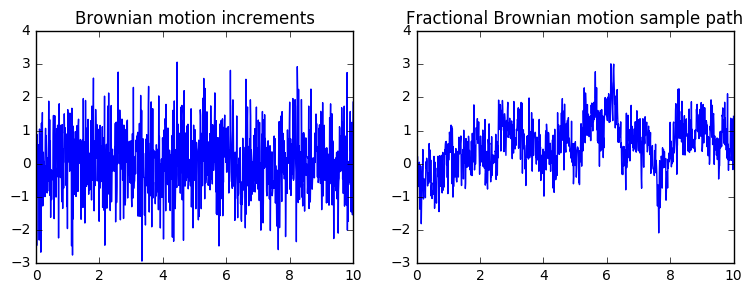

In [80]:
figure(figsize=(9, 3))
subplot(1, 2, 1)
plot(timestamps, Z)
title('Brownian motion increments')
subplot(1, 2, 2)
plot(timestamps, X)
title('Fractional Brownian motion sample path')

Рассмотрим еще случай $H > 1/2$.

In [81]:
timestamps = np.linspace(0.01, 10, 1000)

cov_fbm = compute_fbm_matrix(timestamps, 0.9)
cov_fbm_chol = np.linalg.cholesky(cov_fbm)

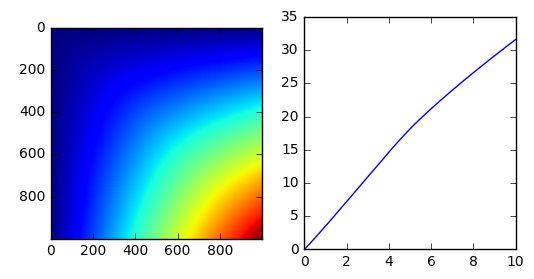

In [82]:
figure(figsize=(6, 3))
subplot(1, 2, 1)
imshow(cov_fbm, interpolation='nearest')
subplot(1, 2, 2)
plot(timestamps, cov_fbm[500, :])

In [85]:
c_bm = np.linalg.cholesky(cov_fbm)
Z = np.random.normal(size=1000)
X = mean_bm + np.dot(c_bm, Z)

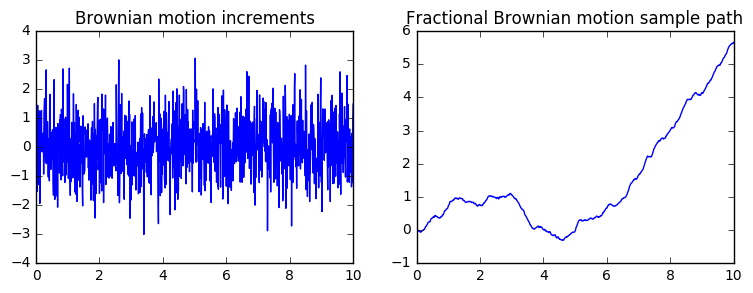

In [86]:
figure(figsize=(9, 3))
subplot(1, 2, 1)
plot(timestamps, Z)
title('Brownian motion increments')
subplot(1, 2, 2)
plot(timestamps, X)
title('Fractional Brownian motion sample path')

Еще раз отобразим траектории fBm при различных увеличивающихся $H$.

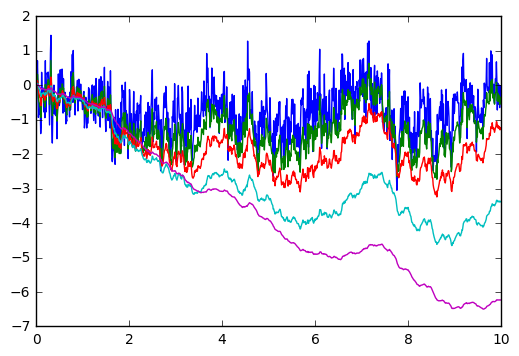

In [92]:
Z = np.random.normal(size=1000)

for H in [0.1, 0.3, 0.5, 0.7, 0.9]:
    cov_fbm = compute_fbm_matrix(timestamps, H)
    c_bm = np.linalg.cholesky(cov_fbm)
    X = mean_bm + np.dot(c_bm, Z)
    plot(timestamps, X)

### 1.3. Процесс Орнштейна-Уленбека

Процесс Орнштейна-Уленбека - это гауссовский процесс $X = (X_t)_{t \geqslant 0}$ с непрерывными траекториями такой, что 
$$
X_t = e^{-t} B_{e^{2t}},
$$
где $B = (B_t)_{t \geqslant 0}$ - обыкновенное броуновское движение.

Легко показать, что $\mathrm{E} X_t = 0$, $\mathrm{E} [X_s X_t] = e^{-|s - t|}$.

In [93]:
def compute_ou_cov(timestamps):
    n = len(timestamps)
    R = np.zeros((n, n))
    for i in xrange(n):
        for j in xrange(n):
            R[i, j] = np.exp(-np.abs(timestamps[i] - timestamps[j]))
    return R

In [94]:
timestamps = np.linspace(0.01, 10, 1000)

cov_ou = compute_ou_cov(timestamps)
cov_ou_chol = np.linalg.cholesky(cov_ou)

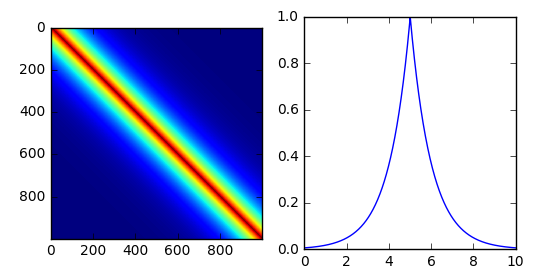

In [95]:
figure(figsize=(6, 3))
subplot(1, 2, 1)
imshow(cov_ou, interpolation='nearest')
subplot(1, 2, 2)
plot(timestamps, cov_ou[500, :])

In [102]:
c_ou = np.linalg.cholesky(cov_ou)
Z = np.random.normal(size=1000)
X = mean_bm + np.dot(c_ou, Z)

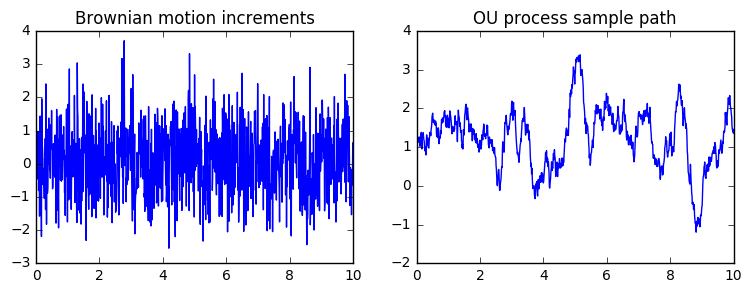

In [103]:
figure(figsize=(9, 3))
subplot(1, 2, 1)
plot(timestamps, Z)
title('Brownian motion increments')
subplot(1, 2, 2)
plot(timestamps, X)
title('OU process sample path')